Using device: mps, Pose device: cpu
Initializing components...
Using TransReID for robust re-identification and tracking
Loading TransReID weights from weights/transreid_vitbase.pth...
Model has 211 parameters
Sample keys: ['base.cls_token', 'base.pos_embed', 'base.sie_embed']
Detected Vision Transformer architecture
Using a placeholder model for demonstration
Creating placeholder model with feature dimension 768
TransReID model loaded successfully on mps
Loading YOLO11 segmentation model...
YOLO11 segmentation model loaded on mps
Loading OpenGait embedder...
Loaded weights from weights/GaitBase_DA-60000.pt
Writing output to results3c/3c.mp4
Starting enhanced video processing with OpenGait features...


Processing frames: 100%|██████████| 200/200 [06:36<00:00,  1.98s/it]


Video processing complete. Features collected.
OpenGait Features Summary:
- Tracks with silhouettes: 5
- Tracks with OpenGait features: 5
- Total OpenGait embeddings: 528
  Track 1: 169 embeddings from 43 silhouettes
  Track 2: 169 embeddings from 43 silhouettes
  Track 3: 64 embeddings from 31 silhouettes
  Track 4: 126 embeddings from 31 silhouettes
  Track 5: 0 embeddings from 1 silhouettes
Collected features for 5 tracks
Total feature records: 1198

=== Starting ID Merging ===
=== Exporting Temporary Data for ID Merger ===
Saved bounding box info: 5 tracks
Creating aggregated features for similarity comparison...
Found 779 unique feature types: ['frame_avg_displacement', 'frame_center_x', 'frame_center_y', 'frame_displacement_std', 'frame_height']...
Created similarity features: (5, 779)
Tracks processed: [1, 2, 3, 4, 5]
Temporary data exported to results3c

=== Starting ID Merger ===

=== Step 1: Name each person ID ===

Showing samples for person with ID 1


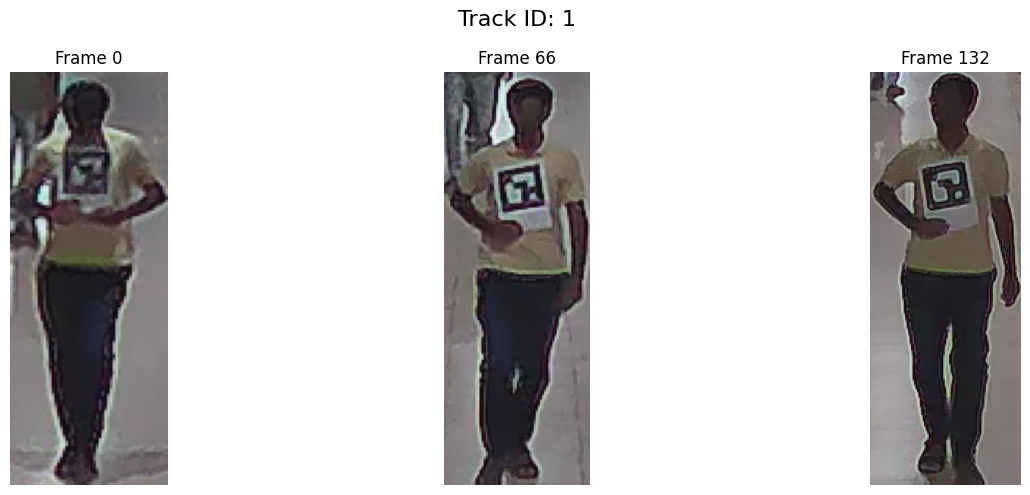


Showing samples for person with ID 2


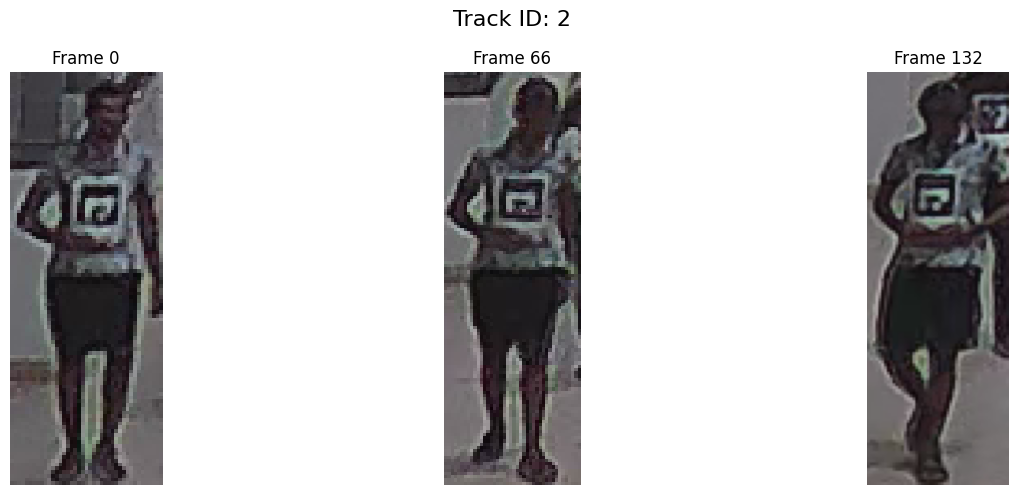


Showing samples for person with ID 3


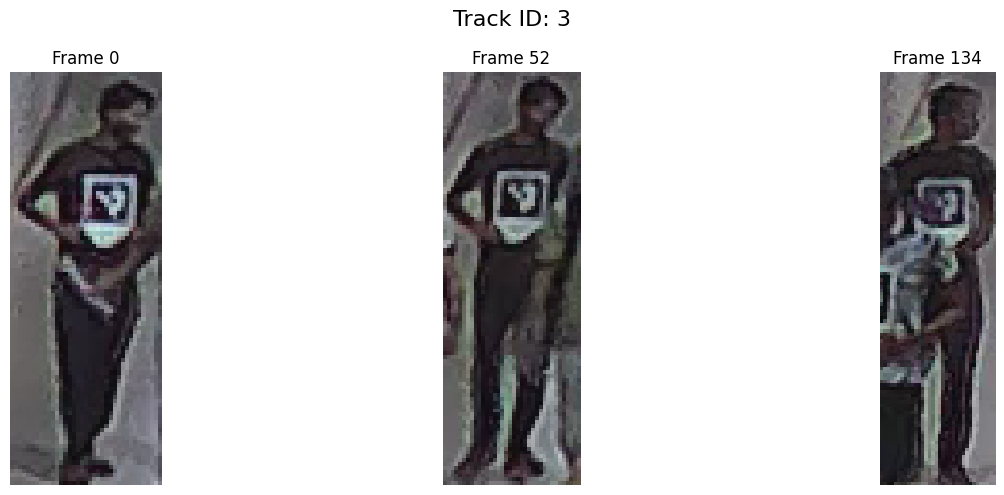


Showing samples for person with ID 4


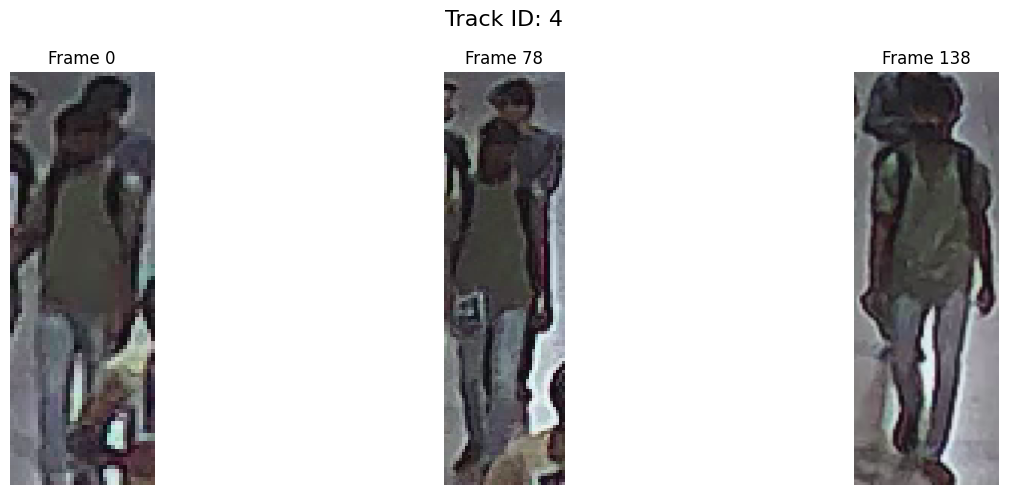


Showing samples for person with ID 5


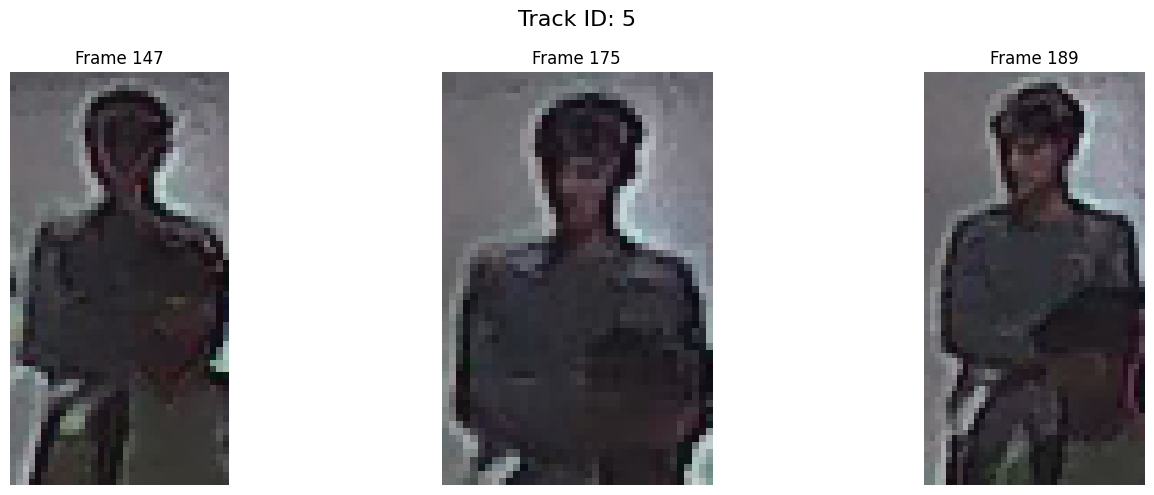



=== Step 2: Merge IDs for the same person ===
Now you can merge IDs that belong to the same person.
Available IDs and their assigned names:
  ID 1: unnamed
  ID 2: unnamed
  ID 3: unnamed
  ID 4: unnamed
  ID 5: unnamed
Invalid input. Please enter comma-separated integers.
Invalid input. Please enter comma-separated integers.
Invalid input. Please enter comma-separated integers.
Invalid input. Please enter comma-separated integers.
Invalid input. Please enter comma-separated integers.
Invalid input. Please enter comma-separated integers.
Invalid input. Please enter comma-separated integers.
Invalid input. Please enter comma-separated integers.
Invalid input. Please enter comma-separated integers.
ID merging complete: 0 merges, 0 named IDs
ID merging complete: {}

=== Applying ID Merging to Frame Features ===
Applying ID merging to frame features...
Merge operations: {}
Frame features merging complete:
  Original tracks: 5
  Final tracks: 5

=== Exporting Enhanced Features with OpenGa

/Users/prachit/self/Working/Fresh/data_processing.py:249: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_df[col] = pd.to_numeric(numeric_df[col], errors='coerce').fillna(0)


✓ OpenGait embeddings saved to: results3c/opengait_embeddings.json

=== Processing Complete ===
Results saved to: results3c
Enhanced CSV with OpenGait features: results3c/3c_frame_features.csv
OpenGait embeddings: results3c/opengait_embeddings.json

Final Summary:
- Original tracks: 5
- Final tracks after merging: 5
- Total feature records: 1198
- OpenGait embeddings: 528


In [2]:
%run main.py \
  --video "../Person_New/input/3c.mp4" \
  --output "results3c/3c.mp4" \
  --results_dir "results3c" \
  --save_bbox_info \
  --merge_ids \
  --use_transreid \
  --save_video \
  --start_frame 0 \
  --end_frame 200 
